<a href="https://colab.research.google.com/github/ignasutyra/Applied-Predictive-Analytics-DATA4001/blob/main/NLP_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing </a>

## Assignment: K Nearest Neighbors Model for the IMDB Movie Review Dataset

For the final project, build a K Nearest Neighbors model to predict the sentiment (positive or negative) of movie reviews. The dataset is originally hosted here: http://ai.stanford.edu/~amaas/data/sentiment/

Use the notebooks from the class and implement the model, train and test with the corresponding datasets.

You can follow these steps:
1. Read training-test data (Given)
2. Train a KNN classifier (Implement)
3. Make predictions on your test dataset (Implement)
4. Expermintation (Implement)

__You can use the KNN Classifier from here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html__

## 1. Reading the dataset

We will use the __pandas__ library to read our dataset.

#### __Training data:__
Let's read our training data. Here, we have the text and label fields. Labe is 1 for positive reviews and 0 for negative reviews.

In [4]:
import pandas as pd

train_df = pd.read_csv('https://raw.githubusercontent.com/aws-samples/aws-machine-learning-university-accelerated-nlp/master/data/final_project/imdb_train.csv', header=0)
train_df.head()

,text,label
0,This movie makes me want to throw up every tim...,0
1,Listening to the director's commentary confirm...,0
2,One of the best Tarzan films is also one of it...,1
3,Valentine is now one of my favorite slasher fi...,1
4,No mention if Ann Rivers Siddons adapted the m...,0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['label']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('label')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='label', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#### __Test data:__

In [3]:
import pandas as pd

test_df = pd.read_csv('https://raw.githubusercontent.com/aws-samples/aws-machine-learning-university-accelerated-nlp/master/data/final_project/imdb_test.csv', header=0)
test_df.head()

,text,label
0,What I hoped for (or even expected) was the we...,0
1,Garden State must rate amongst the most contri...,0
2,There is a lot wrong with this film. I will no...,1
3,"To qualify my use of ""realistic"" in the summar...",1
4,Dirty War is absolutely one of the best politi...,1


## 2. Train a KNN Classifier
Here, you will apply pre-processing operations we covered in the class. Then, you can split your dataset to training and validation here. For your first submission, you will use __K Nearest Neighbors Classifier__. It is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [5]:
# Implement this
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
from sklearn.model_selection import train_test_split

X=train_df[["text"]]
Y=train_df["label"]
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  Y,
                                                  test_size=0.10,
                                                  shuffle=True,
                                                  random_state=324
                                                 )

In [10]:
print("Processing the text fields")
train_text_list = process_text(X_train["text"].tolist())
val_text_list = process_text(X_val["text"].tolist())

Processing the text fields


## 3. Make predictions on your test dataset

Once we select our best performing model, we can use it to make predictions on the test dataset. You can simply use __.fit()__ function with your training data to use the best performing K value and use __.predict()__ with your test data to get your test predictions.

In [54]:
# Implement this

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier


import gensim
from gensim.models import Word2Vec
### PIPELINE ###
##########################
w2v = gensim.models.Word2Vec()
pipeline = Pipeline([
    ('text_vect', CountVectorizer(binary=True,
    #( 'text_vect', TfidfVectorizer(use_idf=True,
                                  max_features=5000)),
    ('knn', KNeighborsClassifier(43))
                                ])



from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('text_vect', CountVectorizer(binary=True, max_features=5000)),
                ('knn', KNeighborsClassifier(n_neighbors=43))])

In [55]:
# We using lists of processed text fields
X_train = train_text_list
X_val = val_text_list

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train.values)

Pipeline(steps=[('text_vect', CountVectorizer(binary=True, max_features=5000)),
                ('knn', KNeighborsClassifier(n_neighbors=43))])

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Use the fitted pipeline to make predictions on the validation dataset
val_predictions = pipeline.predict(X_val)
print(confusion_matrix(y_val.values, val_predictions))
print(classification_report(y_val.values, val_predictions))
print("Accuracy (validation):", accuracy_score(y_val.values, val_predictions))

[[ 590  690]
 [ 155 1065]]
              precision    recall  f1-score   support

           0       0.79      0.46      0.58      1280
           1       0.61      0.87      0.72      1220

    accuracy                           0.66      2500
   macro avg       0.70      0.67      0.65      2500
weighted avg       0.70      0.66      0.65      2500

Accuracy (validation): 0.662


## 4. Experimentation

For each of the following tasks, track both the **weighted F1-score** and **accuracy**:

1. **Change the binary parameter in CountVectorizer**: Test both `binary=True` and `binary=False`, and evaluate performance.
2. **Switch to TfidfVectorizer**: Replace the CountVectorizer with TfidfVectorizer and compare results.
3. **Adjust the max_features**: Experiment with different values of `max_features` for both TfidfVectorizer and CountVectorizer (`binary=True`).
4. **Optimize KNN**: Select the best-performing model from task 3 and vary the number of neighbors (`n_neighbors`) in the KNN classifier.


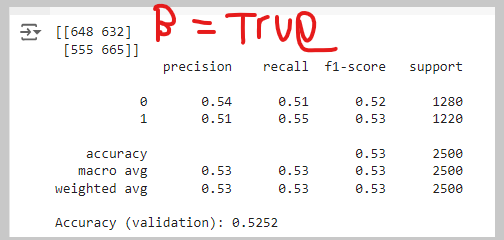
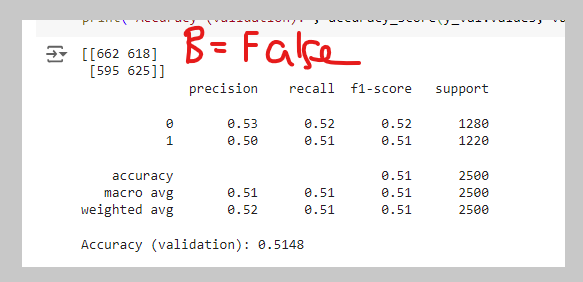

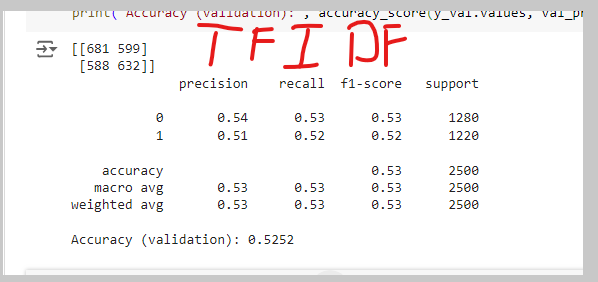

In [ ]:
# Task 3

# Implement this

# 1. TFIDF, maxf =
# 2. TFIDF, maxf =
# 3. TFIDF, maxf =

# 1. Count, maxf =
# 2. Count, maxf =
# 3. Count, maxf =


# 1. Count, maxf = 10
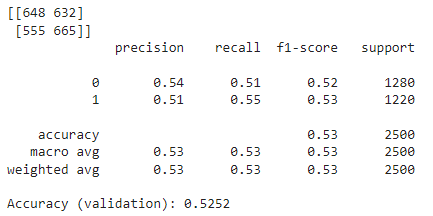

# 2. Count, maxf = 100
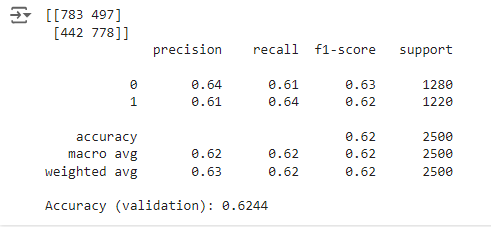

# 3. Count, maxf = 200

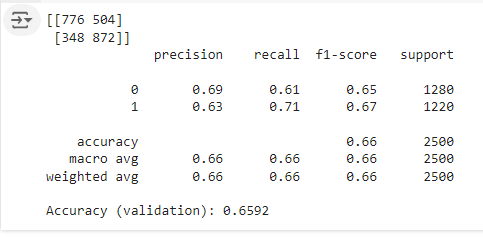

# 1. TFIDF, maxf = 10

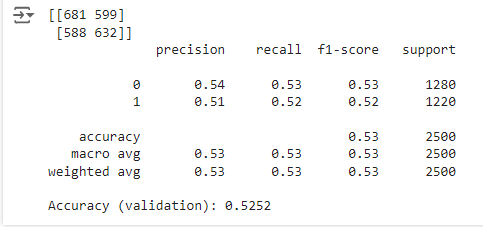


# 2. TFIDF, maxf = 100

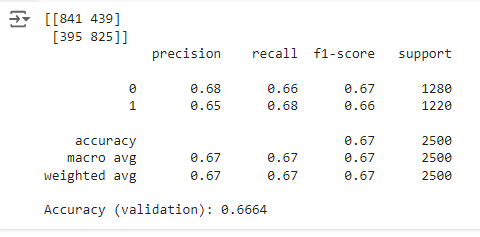

# 3. TFIDF, maxf = 200

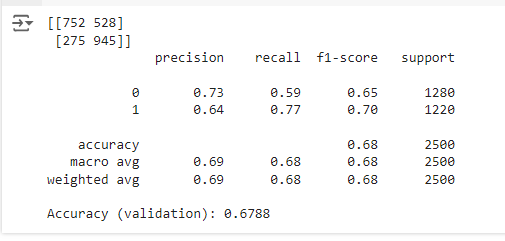

# 4. TFIDF, maxf = 400

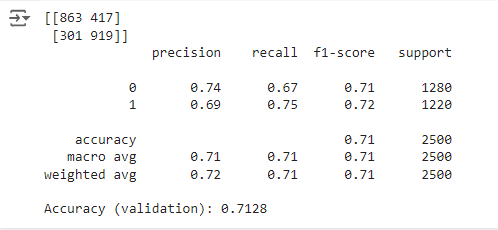

# 5. TFIDF, maxf = 800

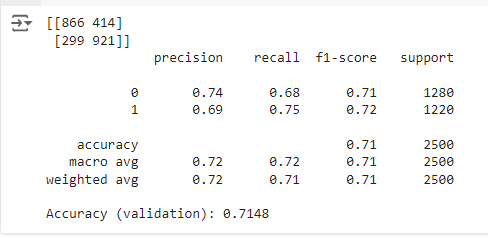

In [ ]:
# Task 4

# Implement this


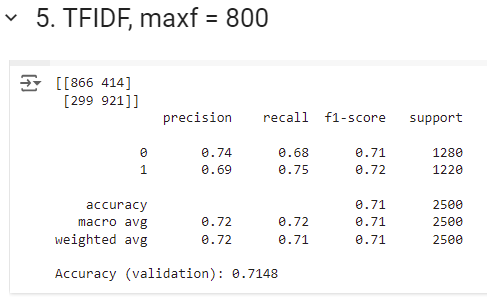